In [4]:
### Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

In [7]:
### html from Project Gutenberg for 'Wealth of Nations' by Smith, 'On the Principles of Political Economy and Taxation' by Ricardo, 
### 'Principles of Political Economy' by Mill and 'The Condition of the Working-Class in England in 1844' by Engels  

wealth = requests.get('http://www.gutenberg.org/files/3300/3300-h/3300-h.htm')
taxation = requests.get('http://www.gutenberg.org/files/33310/33310-h/33310-h.htm')
polyEcon = requests.get('http://www.gutenberg.org/files/30107/30107-h/30107-h.html')
workingClass = requests.get('http://www.gutenberg.org/files/17306/17306-h/17306-h.htm')

In [8]:
### combine raw econ texts into a list that can be iterated through

econTexts_raw = [wealth, taxation, polyEcon, workingClass]

In [14]:
### do some processing on raw texts, then create dict and assign dict keys (author last names) to texts processed by BeautifulSoup

econTextNames = ['Smith', 'Ricardo', 'Mill', 'Engels']
econDict = {}

for i, t in enumerate(econTexts_raw):
    t.encoding = 'utf-8'
    t_html = t.text
    t_soup = BeautifulSoup(t_html, 'html.parser')
    t_text = t_soup.get_text()
    econDict[econTextNames[i]] = t_text

In [15]:
econDict.keys()

dict_keys(['Smith', 'Ricardo', 'Mill', 'Engels'])

In [79]:
econDict['Smith'][:1000]

'\n\n\n\n\r\n      An Inquiry Into the Nature and Causes of The Wealth Of Nations, by Adam\r\n      Smith\r\n    \n\r\n    \r\n    body { margin:5%; background:#faebd0; text-align:justify}\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}\r\n    .toc       { margin-left: 10%; margin-bottom: .75em;}\r\n    .toc2      { margin-left: 20%;}\r\n    div.fig    { display:block; margin:0 auto; text-align:center; }\r\n    div.middle { margin-left: 20%; margin-right: 20%; text-align: justify; }\r\n

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

In [20]:
(len(econDict.values()), type(econDict.values()))

(4, dict_values)

In [21]:
### put dictionary values (texts) into single list that will be corpus for use in NLP algorithms

econ_corpus = [val for val in econDict.values()]

In [80]:
econ_corpus[0][:1000]

'\n\n\n\n\r\n      An Inquiry Into the Nature and Causes of The Wealth Of Nations, by Adam\r\n      Smith\r\n    \n\r\n    \r\n    body { margin:5%; background:#faebd0; text-align:justify}\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}\r\n    .toc       { margin-left: 10%; margin-bottom: .75em;}\r\n    .toc2      { margin-left: 20%;}\r\n    div.fig    { display:block; margin:0 auto; text-align:center; }\r\n    div.middle { margin-left: 20%; margin-right: 20%; text-align: justify; }\r\n

In [23]:
len(econ_corpus)

4

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

In [25]:
### instantiate the TfidfVectorizer allowing for ngrams of 1, 2 and 3 words in length to be used as features

vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True, ngram_range=(1,3))


### fit the TfidfVectorizer to darwin_corpus and then generate document-term sparse matrix ('X') with Tf-idf scores

X = vectorizer.fit_transform(econ_corpus)

In [26]:
X.shape

(4, 687520)

In [27]:
### feature names of tokens are stored in TfidfVectorizer object 

vectorizer.get_feature_names()

['00',
 '00 00',
 '00 00 00',
 '00 00 24',
 '00 00 33',
 '00 00 48',
 '00 00 96',
 '00 12',
 '00 12 00',
 '00 24',
 '00 24 00',
 '00 33',
 '00 33 32',
 '00 36',
 '00 36 00',
 '00 48',
 '00 48 00',
 '00 72',
 '00 72 00',
 '00 96',
 '00 96 00',
 '00 day',
 '00 day imagine',
 '00 pg',
 '00 pg 281',
 '000',
 '000 000',
 '000 000 000',
 '000 000 14',
 '000 000 140',
 '000 000 1722',
 '000 000 1825',
 '000 000 1871',
 '000 000 1874',
 '000 000 1881',
 '000 000 1883',
 '000 000 21',
 '000 000 272there',
 '000 000 335',
 '000 000 346',
 '000 000 44',
 '000 000 50',
 '000 000 600',
 '000 000 800',
 '000 000 absorbed',
 '000 000 accumulation',
 '000 000 acres',
 '000 000 actual',
 '000 000 actually',
 '000 000 although',
 '000 000 annual',
 '000 000 annually',
 '000 000 authorized',
 '000 000 bank',
 '000 000 beginning',
 '000 000 bonds',
 '000 000 built',
 '000 000 capital',
 '000 000 capitalist',
 '000 000 charge',
 '000 000 circulating',
 '000 000 circulation',
 '000 000 compromise',
 '000 00

In [30]:
### generate a pandas dataframe from the doc-term matrix containing the docs (rows) and the Tf-idf scores for n-grams as columns

import pandas as pd

econ_corpus_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [31]:
econ_corpus_tfidf.head()

,00,00 00,00 00 00,00 00 24,00 00 33,00 00 48,00 00 96,00 12,00 12 00,00 24,...,œuvres complètes tom,τῆς,τῆς φύσεως,τῆς φύσεως indicating,φύσεως,φύσεως indicating,φύσεως indicating reverence,χράτησις,χράτησις τῆς,χράτησις τῆς φύσεως
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.008987,0.002344,0.000781,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.002344,...,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
### top 20 tf-idf scores for 'Wealth of Nations' by Smith relative to the full corpus

econ_corpus_tfidf.transpose()[0].sort_values(ascending=False)[:20]

upon         0.275356
great        0.206061
part         0.182615
would        0.164901
price        0.164640
country      0.161775
labour       0.161071
one          0.146535
greater      0.141325
much         0.131296
may          0.127909
trade        0.126346
produce      0.123090
must         0.116577
therefore    0.113842
different    0.111237
every        0.107068
silver       0.105310
quantity     0.103812
value        0.103421
Name: 0, dtype: float64

In [66]:
top20_Smith = econ_corpus_tfidf.transpose()[0].sort_values(ascending=False)[:20]
top20_Smith = top20_Smith.to_dict()

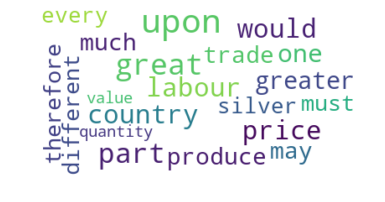

In [67]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(top20_Smith)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [33]:
### top 20 tf-idf scores for 'On the Principles of Political Economy and Taxation' by Ricardo relative to the full corpus

econ_corpus_tfidf.transpose()[1].sort_values(ascending=False)[:20]

would          0.400388
price          0.293920
value          0.256826
labour         0.219236
produce        0.168763
capital        0.167347
corn           0.160552
rent           0.155171
quantity       0.149791
commodities    0.144411
money          0.143845
profits        0.143562
tax            0.139031
wages          0.124590
land           0.123741
rise           0.121759
country        0.103353
may            0.099106
fall           0.088063
per            0.084948
Name: 1, dtype: float64

In [64]:
top20_Ricardo = econ_corpus_tfidf.transpose()[1].sort_values(ascending=False)[:20]
top20_Ricardo = top20_Ricardo.to_dict()

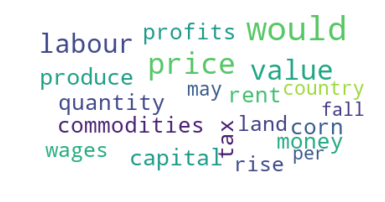

In [65]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(top20_Ricardo)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [34]:
### top 20 tf-idf scores for 'Principles of Political Economy' by Mill relative to the full corpus

econ_corpus_tfidf.transpose()[2].sort_values(ascending=False)[:20]

labor            0.359085
would            0.213893
capital          0.210426
money            0.171481
value            0.166384
one              0.155985
production       0.155781
wages            0.155169
pg               0.132536
cost             0.129681
may              0.126011
country          0.118467
laborers         0.112141
states           0.103582
demand           0.100727
increase         0.096445
united           0.095222
price            0.094406
land             0.094202
united states    0.092775
Name: 2, dtype: float64

In [60]:
top20_Mill = econ_corpus_tfidf.transpose()[2].sort_values(ascending=False)[:20]
top20_Mill = top20_Mill.to_dict()

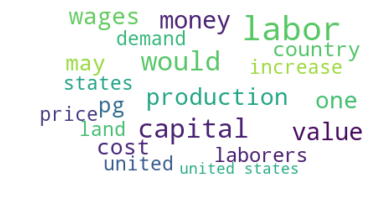

In [61]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(top20_Mill)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [35]:
### top 20 tf-idf scores for 'The Condition of the Working-Class in England in 1844' by Engels relative to the full corpus

econ_corpus_tfidf.transpose()[3].sort_values(ascending=False)[:20]

bourgeoisie    0.243001
one            0.237654
workers        0.215700
working        0.206174
work           0.185335
upon           0.149864
class          0.124591
men            0.123704
children       0.118827
working men    0.111200
every          0.102422
english        0.099762
great          0.097101
manchester     0.093822
must           0.092224
bourgeois      0.091763
whole          0.089564
proletariat    0.089214
factory        0.086772
england        0.085573
Name: 3, dtype: float64

In [49]:
top20_Engels = econ_corpus_tfidf.transpose()[3].sort_values(ascending=False)[:20]
top20_Engels = top20_Engels.to_dict()


In [50]:
top20_Engels

{'bourgeois': 0.091762623155125331,
 'bourgeoisie': 0.24300102057746156,
 'children': 0.11882708936806625,
 'class': 0.12459108997174111,
 'england': 0.085573239731480538,
 'english': 0.099761548909757108,
 'every': 0.10242185688068396,
 'factory': 0.086771694377305988,
 'great': 0.097101240938830255,
 'manchester': 0.093821894545462095,
 'men': 0.12370432064809882,
 'must': 0.092224009658797679,
 'one': 0.23765417873613251,
 'proletariat': 0.089213661400816296,
 'upon': 0.14986401569554625,
 'whole': 0.089563701687870825,
 'work': 0.18533478864123765,
 'workers': 0.21570036446107266,
 'working': 0.20617386774683136,
 'working men': 0.11119956677185733}

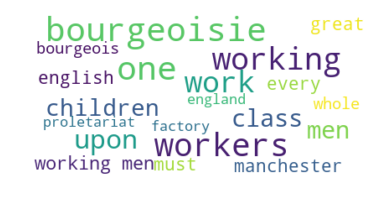

In [57]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud( background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42)
wordcloud.generate_from_frequencies(top20_Engels)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 


In [74]:
from sklearn.utils.extmath import randomized_svd

U, S, V = randomized_svd(X.transpose(), 
                              n_components=12,
                              n_iter=100,
                              random_state=None)

In [75]:
U.shape

(687520, 4)

In [76]:
S.shape

(4,)

In [77]:
V.shape

(4, 4)

In [72]:
X.shape

(4, 687520)

In [73]:
S

array([ 1.59524148,  0.8682148 ,  0.63162658,  0.54995958])